#FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/PGP-DSBA/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

* Order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time are numerical variables
* restaurant_name, cuisine_type, day_of_the_week, and rating are categorical variables
* It appears that not everyone gave a rating for thier orders
* Cost_of_the_order is a float variable whereas the other numerical variables are integers


### **How many rows and columns are present in the data?**

In [ ]:
# Return the dimensions of the DataFrame
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.


### **What are the datatypes of the different columns in the dataset?**

In [ ]:
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The 1898 observations are divided amongst 3 different darte types:
* object: restaurant_name, cuisine_type, day_of_the_week, rating
* int64: order_id, customer_id, food_preparation_time, delivery_time
* float64: cost_of_the_order

133.6+ KB of memory is allocated for this dateset.


### **Are there any missing values in the data?**

In [ ]:
# Return the sum of null values in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There appears to be no null (missing) values in this dataset.

### **Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?**

In [ ]:
# Return statistical summary of the DataFrame
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

* The cost of the orders ranged from \$4.47 to \$35.41. The average cost of an order was \$16.50 and 50% of the orders were \$14.14
* The time it took to prepare the food ranged from 20 minutes to 35 minutes. The average food preparation time was 27.37 minutes and 50% of the orders took 27 minutes to prepare
* The time it took to deliver the food to the customer ranged from 2150 minutes to 33 minutes. The average delivery time was 24.16 minutes and 50% of the orders took 25 minutes to be delivered

### **How many orders are not rated?**

In [ ]:
# Return the count of each value in the rating column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
It appears that 736 orders were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Explore all the variables and provide observations on their distributions.**

In [ ]:
# Return the number of unique order_id's
df['order_id'].nunique()

1898

In [ ]:
# Return the number of unique customer_id's
df['customer_id'].nunique()

1200

In [ ]:
# Return the number of unique restuarant names
df['restaurant_name'].nunique()

178

In [ ]:
# Return the number of unique cusine types
df['cuisine_type'].nunique()

14

In [ ]:
# Return the number of customers for each order count
temp = df['customer_id'].value_counts()
temp2 = pd.DataFrame(temp)
temp2.value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

#### Observations:
It appears that most of the customers have only made 1 purchase from FoodHub. 

In [ ]:
# Create a table that displays how many orders were placed for each cuisine type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

<Axes: xlabel='cuisine_type', ylabel='count'>

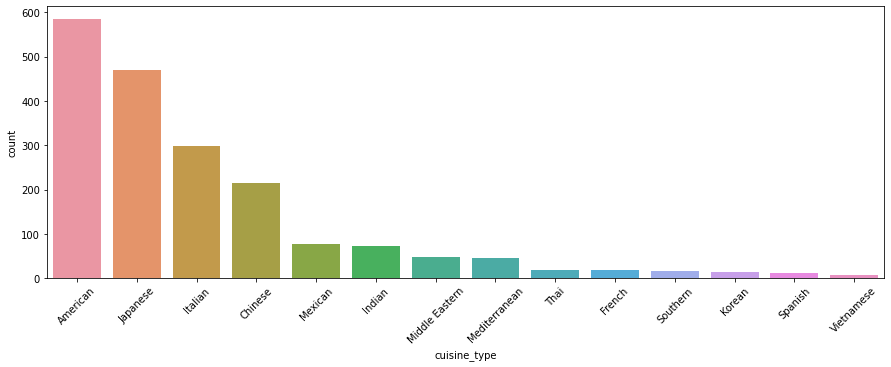

In [ ]:
# Create a countplot for cuisine type
plt.figure(figsize = (15,5))
plt.xticks(rotation= 45)
sns.countplot(data = df, x = 'cuisine_type', order = df.cuisine_type.value_counts().index)

#### Observations:
This graph shows that the majority of the orders placed on FoodHub are of American, Japanese, and Italian cuisines. The lowest amount of orders are placed in the Korean, Spanish, and Vietnamese cuisines.

In [ ]:
# Create a table that displays how many orders were placed for the top 15 restuarants
df['restaurant_name'].value_counts().iloc[:15]

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Rubirosa                          37
Sushi of Gari 46                  37
Momoya                            30
Five Guys Burgers and Fries       29
Name: restaurant_name, dtype: int64

<Axes: xlabel='restaurant_name', ylabel='count'>

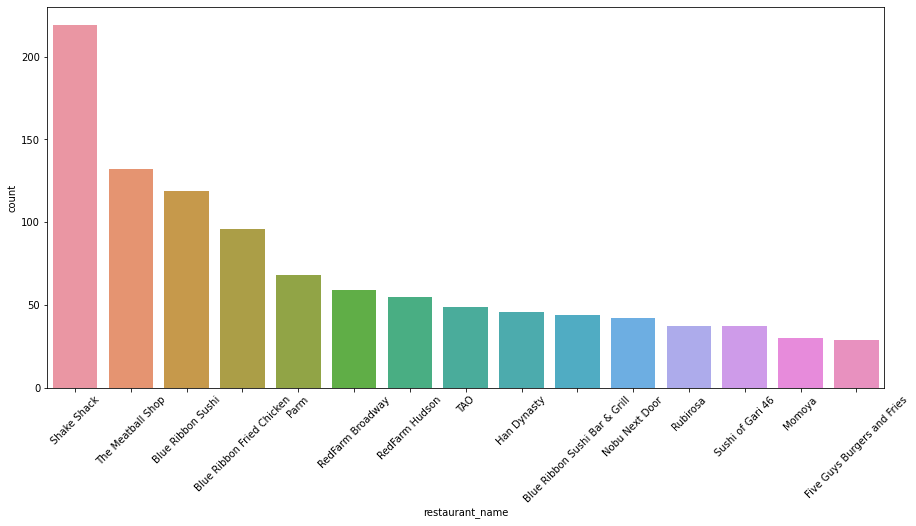

In [ ]:
# Create a countplot for the top 15 restaurants
plt.subplots(figsize = (15, 7))
plt.xticks(rotation= 45)
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:15].index)

#### Observations:
The graph above displays the top 15 restuarants with the most amount of orders. Shake Shake seems to have the most amount of FoodHub orders with more than 200. 

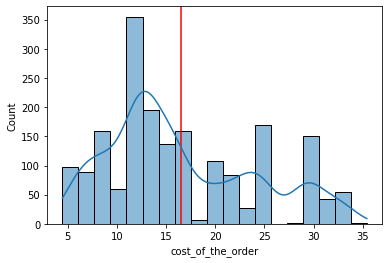

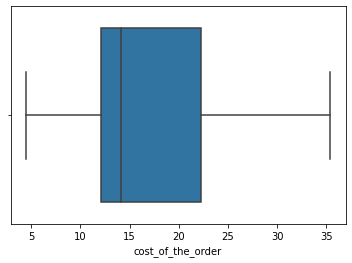

In [ ]:
# Create a histogram and boxplot for cost of the order
plt.axvline(df['cost_of_the_order'].mean(), color = 'r')
sns.histplot(data=df,x='cost_of_the_order', kde = True) 
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show() 

#### Observations:
Both the histogram and the boxplot for the cost of the order seem to be right-skewed. 
* The average cost of an order is about \$16
* Most of the orders seem cost in the range of \$11-\$13
* 50% of the orders cost about \$14
* 25%-75% (the middle 50%) of the orders cost in the range from \$12-\$23


In [ ]:
# Return the unique values for the day of the week category
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
# Create a table that displays how many orders were placed for different days of the week
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

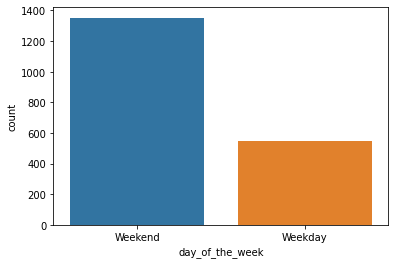

In [ ]:
# Create a countplot for the days of the week
sns.countplot(data = df, x = 'day_of_the_week', order = df.day_of_the_week.value_counts().index);

#### Observations:
There are more than double the amount of orders placed on weekends than on weekdays. 

In [ ]:
# Return the unique values for the rating category
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Create a table that displays the number of entries of each rating 
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

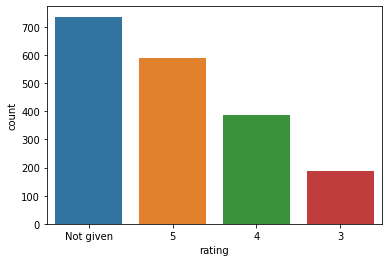

In [ ]:
# Create a countplot for the rating category
sns.countplot(data = df, x = 'rating', order = df.rating.value_counts().index);

#### Observations:
Most of the orders on FoodHub did not receive a rating. Out of the orders that were rated, majority of them received a 5 point rating and the fewest amount of orders received a 3 point rating.

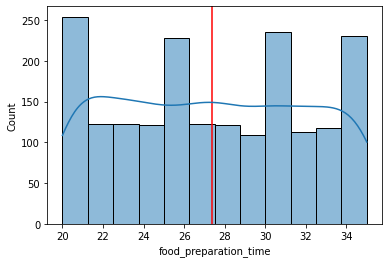

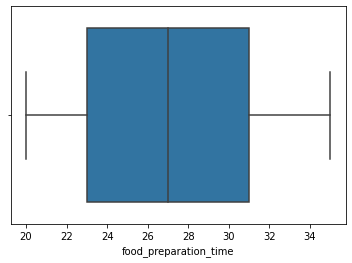

In [ ]:
# Create a histogram and boxplot for the food prepartion time
plt.axvline(df['food_preparation_time'].mean(), color = 'r')
sns.histplot(data=df,x='food_preparation_time', kde = True) 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

#### Observations:
The distribution of the food preparation time appears to be multimodal due to the 4 distinct peaks on the histogram.
* The average time to prepare the food is about 27 minutes
* Most of the orders seem to be prepared between 20-21 minutes
* 50% of the orders took about 27 minutes to prepare
* The time it took for 25%-75% (the middle 50%) of the orders to prepare ranged from 23-31 minutes

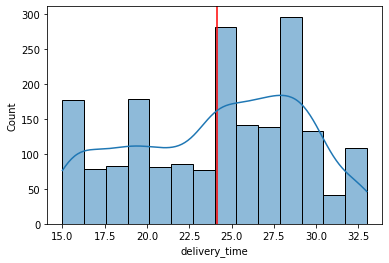

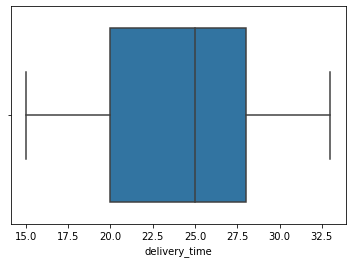

In [ ]:
# Create a histogram and boxplot for the food delivery time
plt.axvline(df['delivery_time'].mean(), color = 'r')
sns.histplot(data=df,x='delivery_time', kde = True) 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

#### Observations:
Both the histogram and boxplot for the food delivery time appear to be slightly left-skewed.
* The average time to deliver the food is about 24 minutes
* Most of the orders seem to be delivered between 28-29 minutes
* 50% of the orders took about 25 minutes to be delivered
* The time it took for 25%-75% (the middle 50%) of the orders to be delivered to the customers ranged from 20-28 minutes

### **Which are the top 5 restaurants in terms of the number of orders received?** 

In [ ]:
# Return the first 5 restaurant names with the most amount of orders
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

Shake shack appears to have the most amount of orderes placed with 219 orders followed by The Meatball Shop with 132 orders. Blue Ribbin Sushi, Blue Ribbin Fried Chicken, and Parm had 119, 96, and 68 orders, respectively.

### **Which is the most popular cuisine on weekends?**

In [ ]:
# Return the number of orders for each cuisine type on the weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American cusisine is the most popular cusine on weekends with 415 orders. It is followed by Japanese and Italian cuisines with 335 and 207 orders, respectively. Southern, Spanish, and Vietnamese cuisines are the least popular cuisines on the weekends with 11, 11, and 4 orders, respectively.

### **What percentage of the orders cost more than 20 dollars?**

In [ ]:
# Filter the orders which cost more than $20 into a new dataframe
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Return the number of rows that have orders that cost more than $20
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of orders that cost more than $20 in the whole dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print('Percentage of orders above 20 dollars:', '{:.2f}%'.format(percentage))

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24%


#### Observations:
There are 555 orders that cost more than $20 in the entire FoodHub dataset. That is approximately 29.24% of the dataset.

### **What is the mean order delivery time?**

In [ ]:
# Return the average order delivery time
print('The mean delivery time for this dataset is','{:.2f}'.format(df['delivery_time'].mean()), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The average delivery time for a FoodHub order is 24.16 minutes.

### **The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.**

In [ ]:
# Return the top 3 custimer_id's that placed the most amount of orders
df['customer_id'].value_counts(ascending = False).head(3) 

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

The customer_id that placed the most amount of orders was 52832 with 13 orders. The customer_id's that have the next highsest orders placed on FoodHub are 47440 and 83287 with 10 and 9 orders, respectively.

### Multivariate Analysis

### **Perform a multivariate analysis to explore relationships between the important variables in the dataset.**

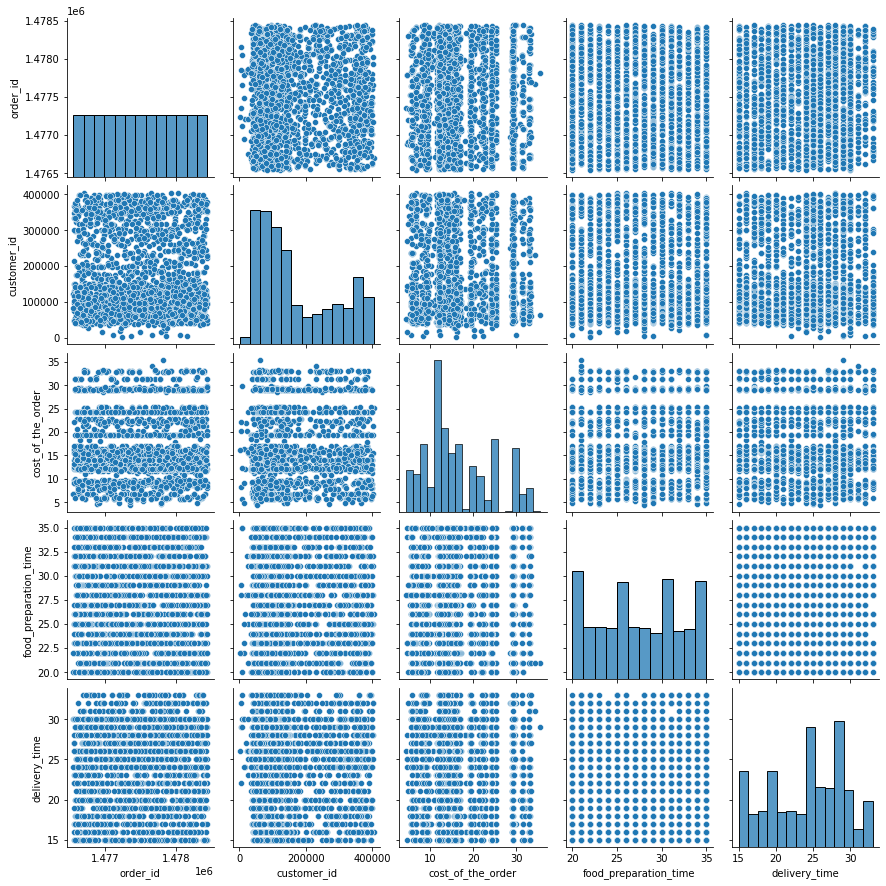

In [ ]:
# Output scatterplots to highlight the relationships between the numeric variables
sns.pairplot(data = df)

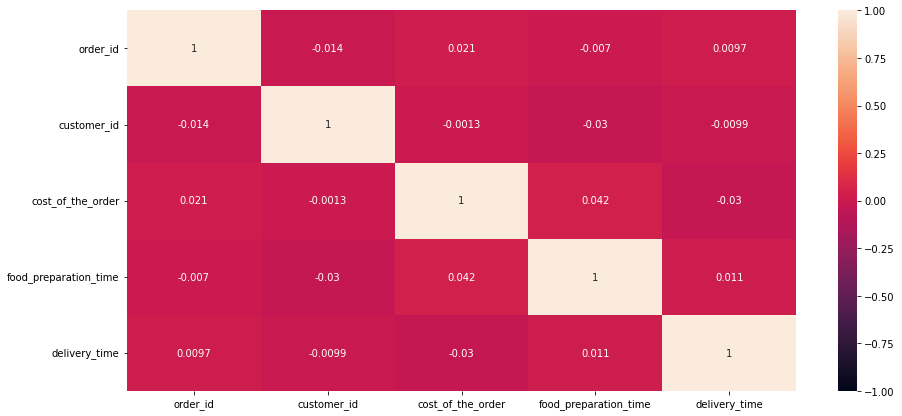

In [ ]:
#  Plot the heatmap of the numeric variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

#### Observations:
There does not seem to be a strong correlation amongst any of the numeric variables.

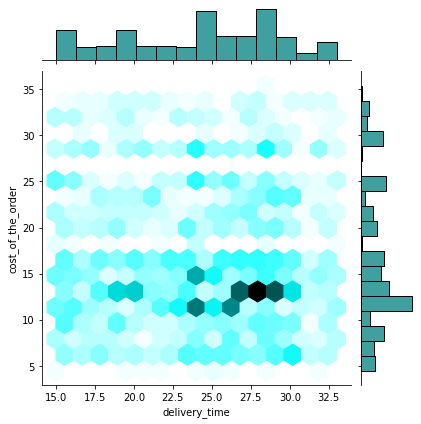

In [ ]:
# Visualize order values that are densely populated for delivery time and cost of the order
sns.jointplot(data = df, x = 'delivery_time', y = 'cost_of_the_order', kind = 'hex', color = 'teal');

#### Observations:
Many of the orders cost around \$11 - \$13 and took about 23 - 30 minutes to be delivered.

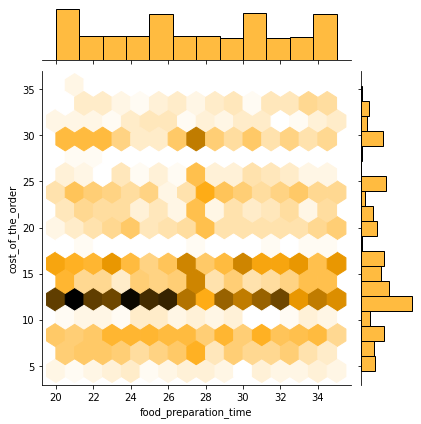

In [ ]:
# Visualize order values that are densely populated for food preparation time and cost of the order
sns.jointplot(data = df, x = 'food_preparation_time', y = 'cost_of_the_order', kind = 'hex', color = 'orange');

#### Observations:
Many of the orders cost around \$11 - \$13 and took about 20 - 26 minutes to be prepared.

In [ ]:
# Output the statistical summary for cusine type and cost of the order 
df.groupby(['cuisine_type'])['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,16.319829,7.462290,4.71,12.0800,14.120,22.2600,33.18
Chinese,215.0,16.305209,7.631503,4.75,12.1050,14.120,21.8800,34.19
French,18.0,19.793889,6.508990,11.98,13.0525,20.470,23.6550,29.25
Indian,73.0,16.919726,7.897493,5.34,11.6400,16.150,24.2000,33.03
Italian,298.0,16.418691,7.268831,5.05,12.0800,14.480,22.2600,33.03
Japanese,470.0,16.304532,7.422722,4.47,12.0800,14.070,21.8300,33.37
Korean,13.0,14.001538,7.563540,5.77,11.8400,12.180,14.0200,30.75
Mediterranean,46.0,15.474783,7.604720,5.67,12.0925,13.995,18.7825,35.41
Mexican,77.0,16.933117,7.555108,4.85,12.0800,15.570,22.3600,33.32


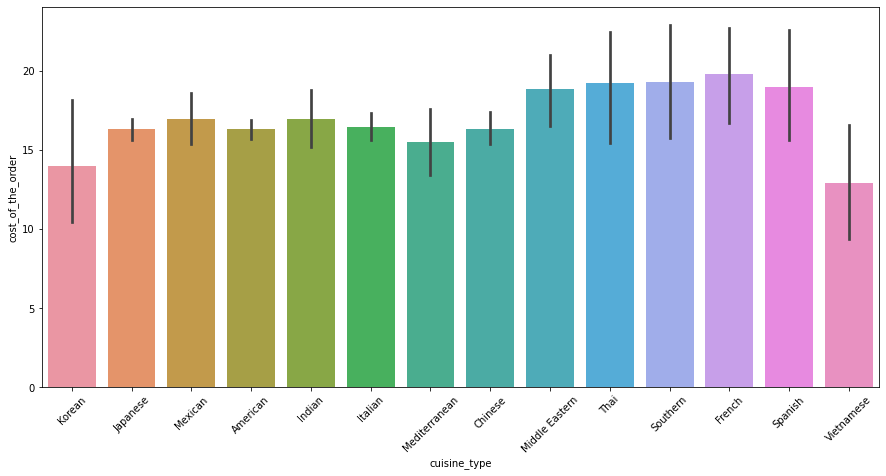

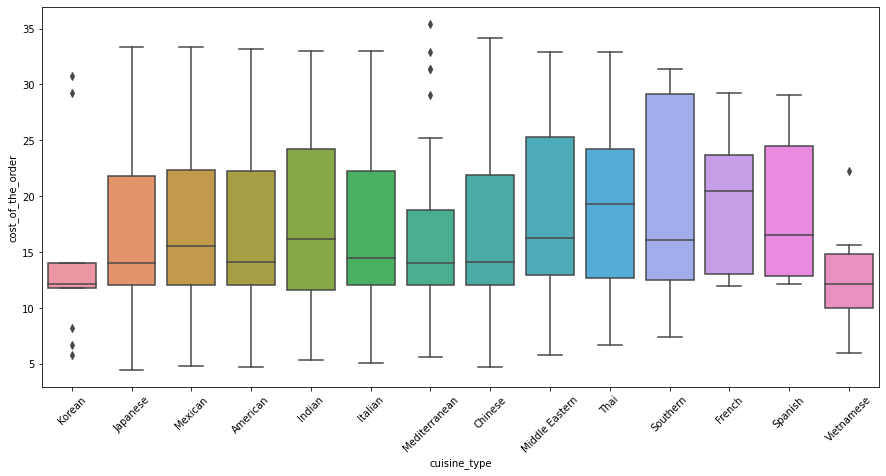

In [ ]:
# Return the relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average cost of the orders for each cuisine type appears to be similar throughout. Although, Vietnamese cusisine seems to have a slightly lower average cost.
* The median cost for all the cuisines are about the same with the exception of Thai and French cuisines, which appear to have slightly higher median costs.
* There are outliers for Korean, Mediterranean, and Vietnamese cuisines. There are unusually high and unusually costs for Korean and Mediterranean cuisines whereas there is only unusually high cost for Vietnamese cuisine.

In [ ]:
# Output the statistical summary for cusine type and food preparation time
df.groupby(['cuisine_type'])['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


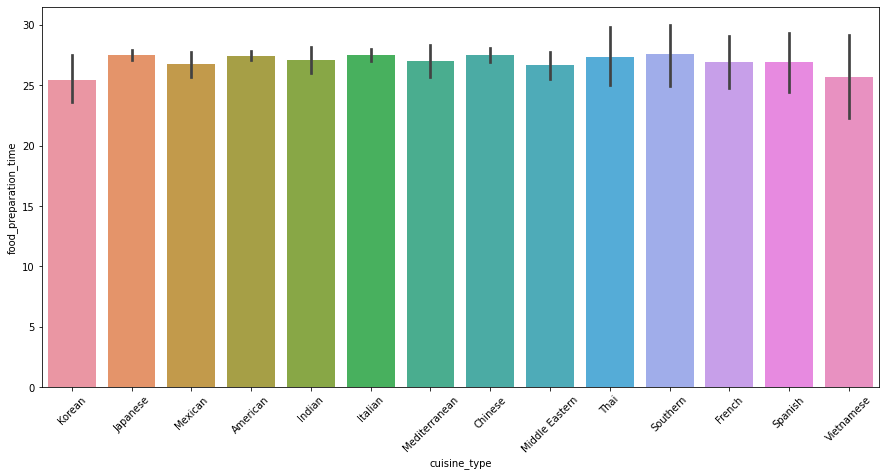

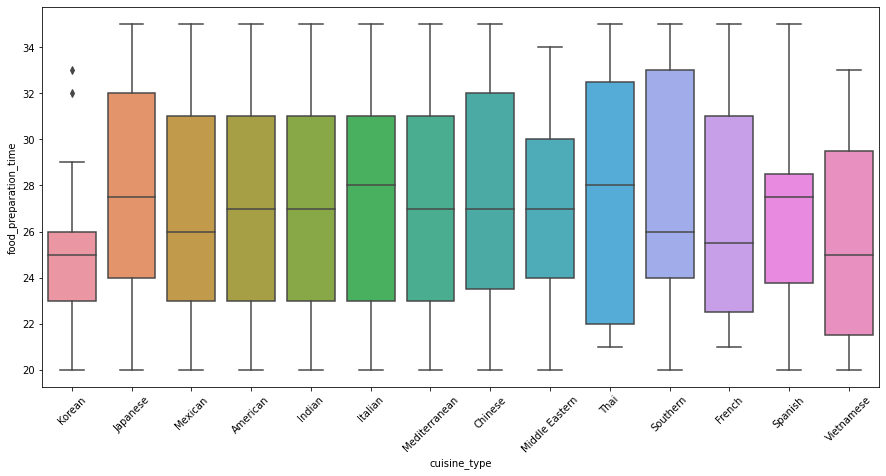

In [ ]:
# Relationship between food prepartion time and cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average time to prepare the orders for each cuisine type appears to be similar throughout.
* The median food preparation time for all the cuisines are about the same.
* There are outliers for orders that are of Korean cuisine. A few orders took unusually longer than the others to prepare.

In [ ]:
# Output the statistical summary for cusine type and delivery time
df.groupby(['cuisine_type'])['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,24.193493,4.831844,15.0,20.00,25.0,28.00,33.0
Chinese,215.0,23.855814,4.966491,15.0,20.00,24.0,28.00,33.0
French,18.0,25.333333,3.741657,17.0,23.25,27.0,28.75,29.0
Indian,73.0,24.082192,5.054573,15.0,20.00,25.0,29.00,32.0
Italian,298.0,24.567114,5.179329,15.0,20.00,26.0,28.75,33.0
Japanese,470.0,24.131915,4.987366,15.0,20.00,25.0,28.00,33.0
Korean,13.0,20.923077,4.030334,16.0,17.00,20.0,26.00,26.0
Mediterranean,46.0,23.586957,5.422489,15.0,19.00,24.0,28.75,33.0
Mexican,77.0,24.389610,4.559997,16.0,21.00,25.0,28.00,33.0


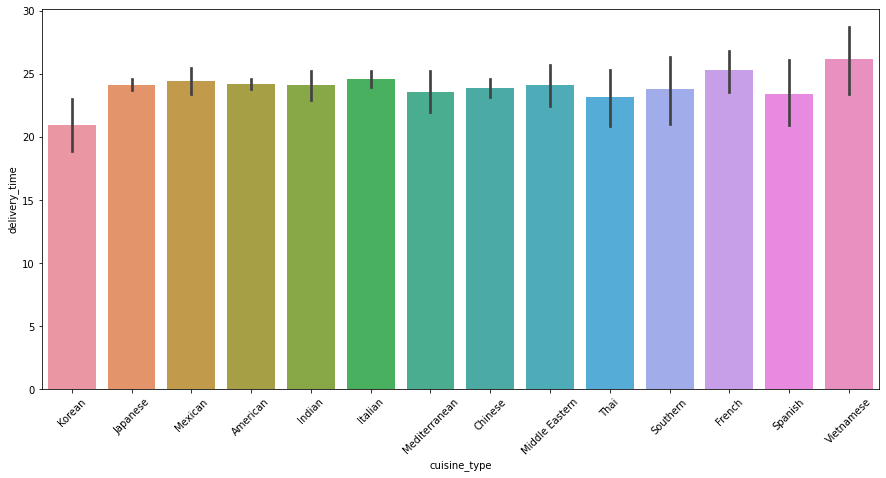

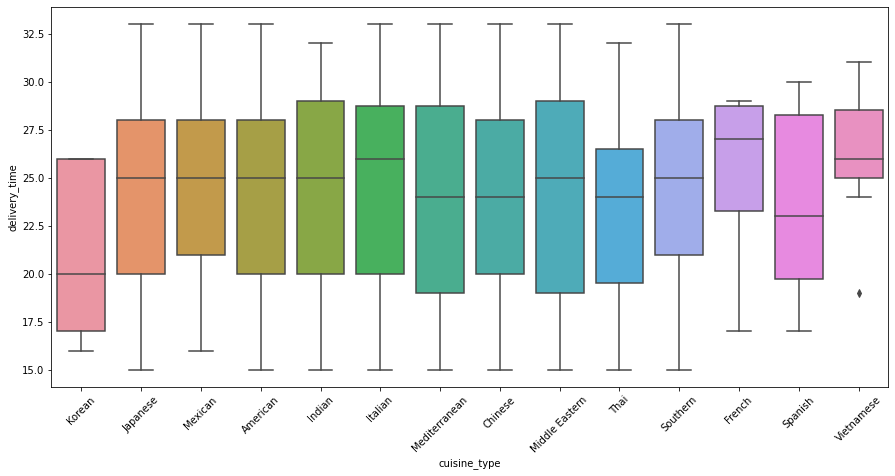

In [ ]:
# Relationship between delivery time and cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x = 'cuisine_type', y = 'delivery_time', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'delivery_time', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average time to deliver the orders for each cuisine type appears to be similar throughout. Although, Korean cusisine seems to have a slightly lower delivery time.
* The median delivery time for all the cuisines are about the same with the exception of Korean cuisine, which appear to have slightly lower time to deliver.
* There are outliers for orders of Vietnamese cuisine. Some orders took unusually less time to deliver.

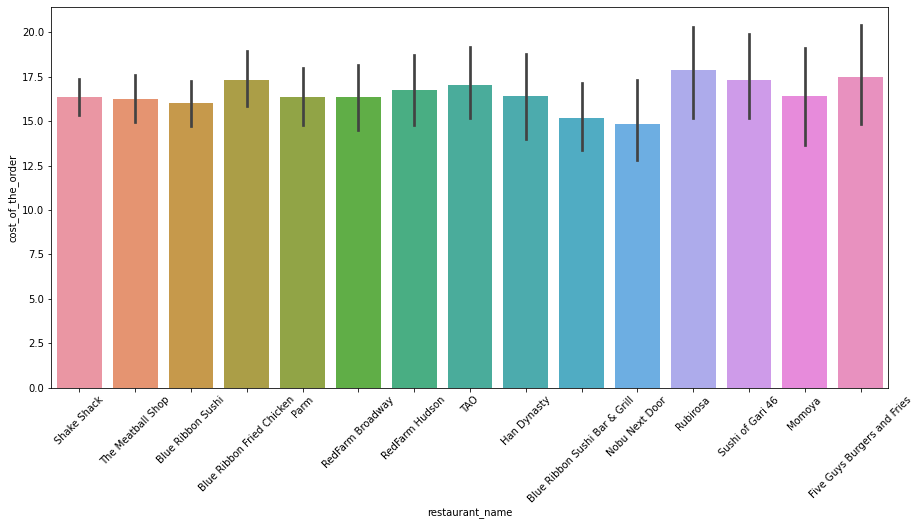

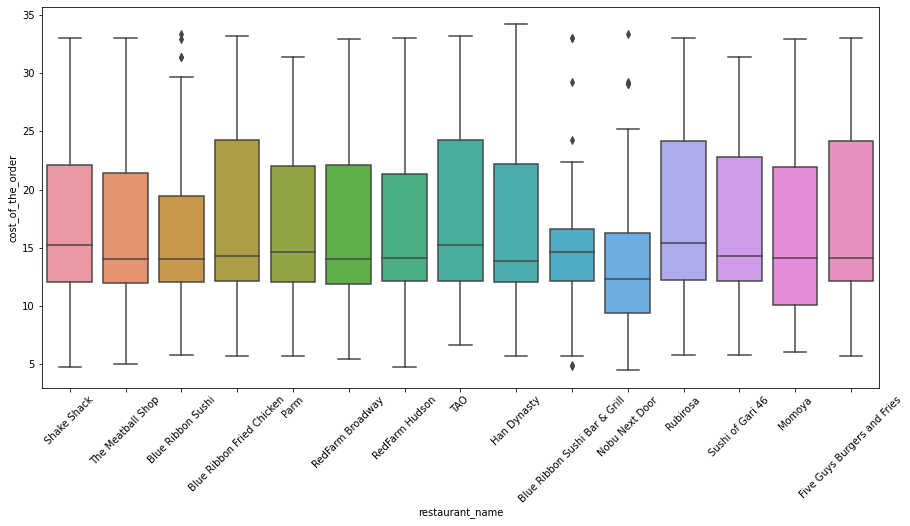

In [ ]:
# Return the relationship between cost of the order and the to 15 restaurants with the most amount of orders
plt.figure(figsize=(15,7))
sns.barplot(x = 'restaurant_name', y = 'cost_of_the_order', data = df, order = df.restaurant_name.value_counts().iloc[:15].index)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'restaurant_name', y = 'cost_of_the_order', data = df, order = df.restaurant_name.value_counts().iloc[:15].index)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average cost of an order for the top 15 restaurants with the most amount of orders is similiar throughout.
* The median cost of an order is pretty similar for all of these restaurants
* There are outliers for Blue Ribbin Sushi, Blue Ribbin Sushi Bar & Grill, and Nobu Next Door. This could be because fo certain exclusive menue items that cost unusually higher or lower than the rest of the distribution.

In [ ]:
# Output the statistical summary for day of the week and cost of the order
df.groupby(['day_of_the_week'])['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,16.311188,7.479521,4.75,12.08,14.07,22.285,35.41
Weekend,1351.0,16.574833,7.486979,4.47,12.08,14.41,22.285,33.37


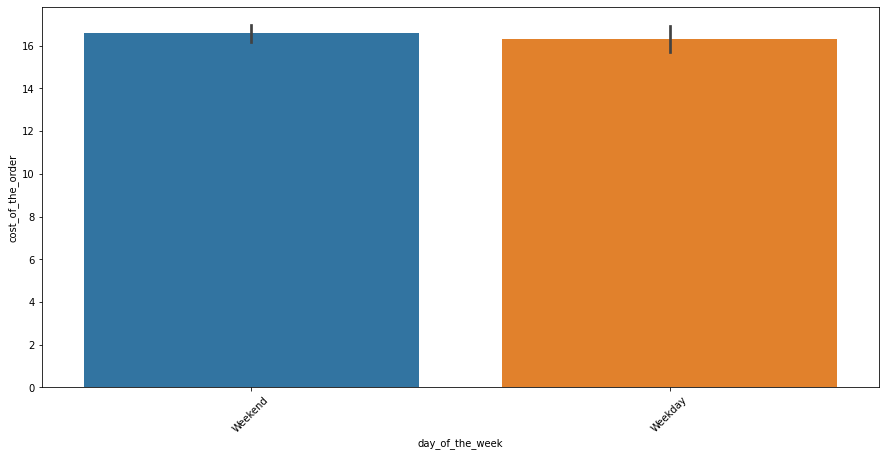

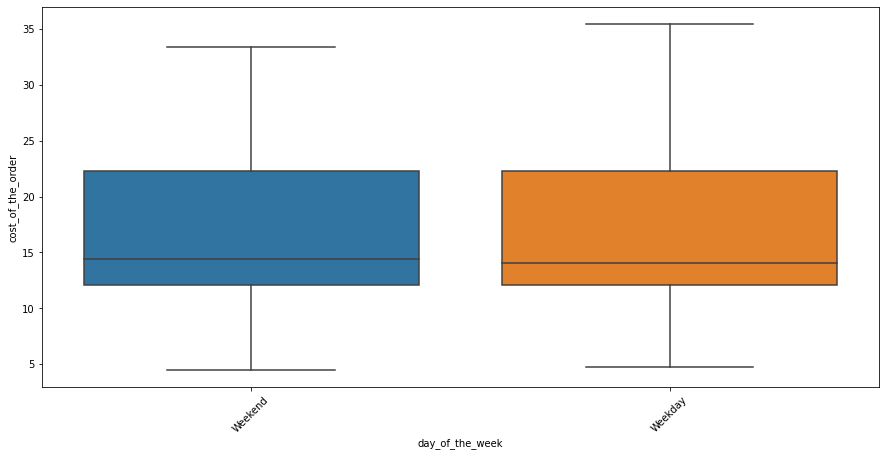

In [ ]:
# Relationship between day of the week and cost of the order
plt.figure(figsize=(15,7))
sns.barplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average cost of an order stays similar regardles of what day of the week it is. 
* The cost of the order seems to be similarly distributed for both weekends and weekdays. Both distributions are slightly right-skewed, meaning that there appears to be more orders that cost on the higher end than on the lower end for both weekends and weekdays.

In [ ]:
# Output the statistical summary for day of the week and food preparation time
df.groupby(['day_of_the_week'])['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,27.212066,4.708616,20.0,23.0,27.0,31.0,35.0
Weekend,1351.0,27.436714,4.601476,20.0,23.0,27.0,31.0,35.0


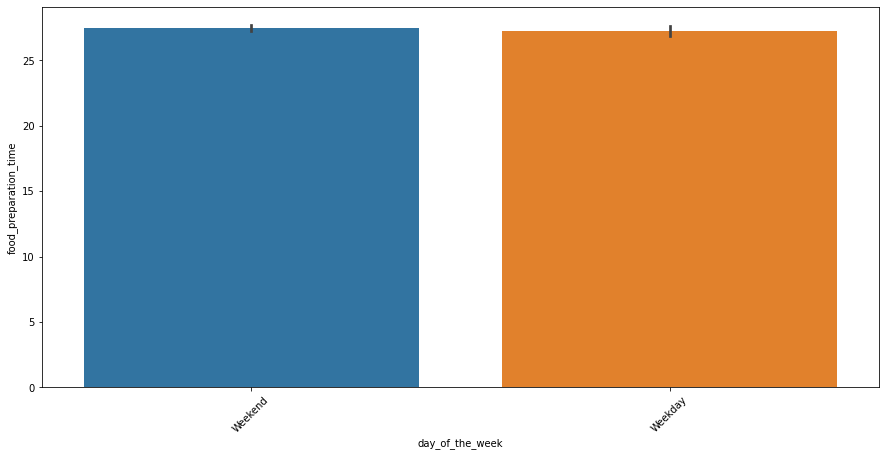

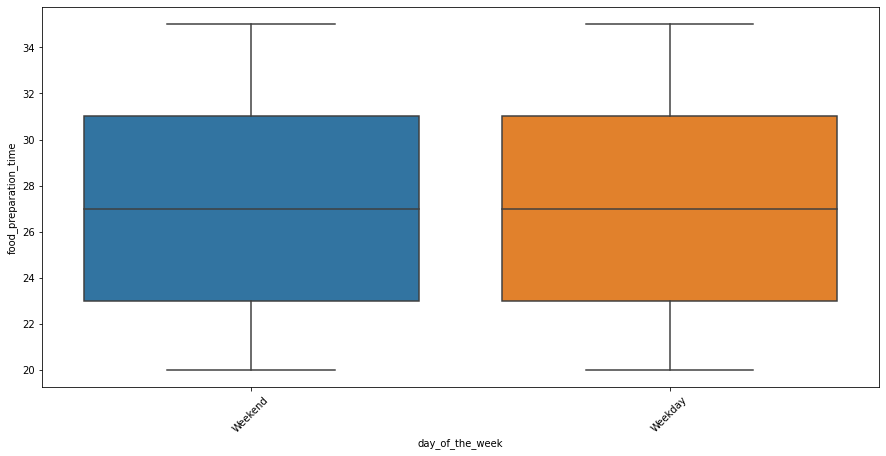

In [ ]:
# Relationship between day of the week and food prepration time
plt.figure(figsize=(15,7))
sns.barplot(x = 'day_of_the_week', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average time to prepare the food is similar regardles of what day of the week it is. 
* The food preparation time seems to be similarly distributed for both weekends and weekdays. Both distributions appear to be mormally distributed, meaning that the mean and median times to prepare the food are very similar. This interesting considering that weekends had nearly double the amount of orders compared to weekdays.

In [ ]:
# Output the statistical summary for day of the week and delivery time
df.groupby(['day_of_the_week'])['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


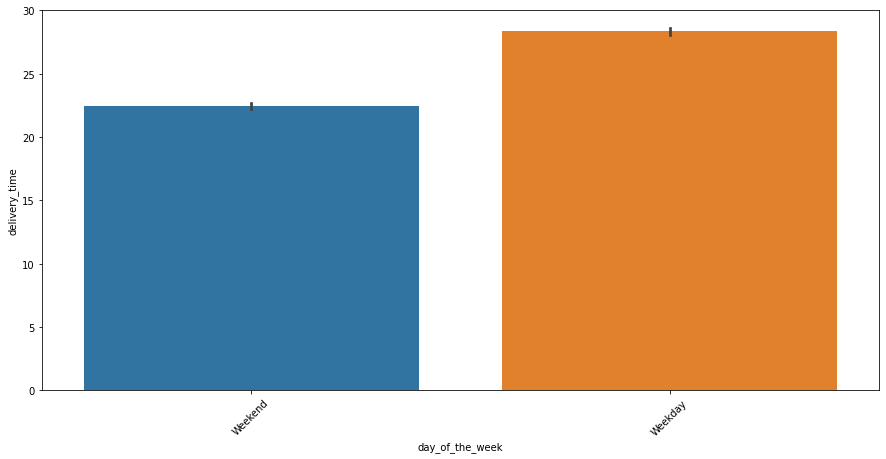

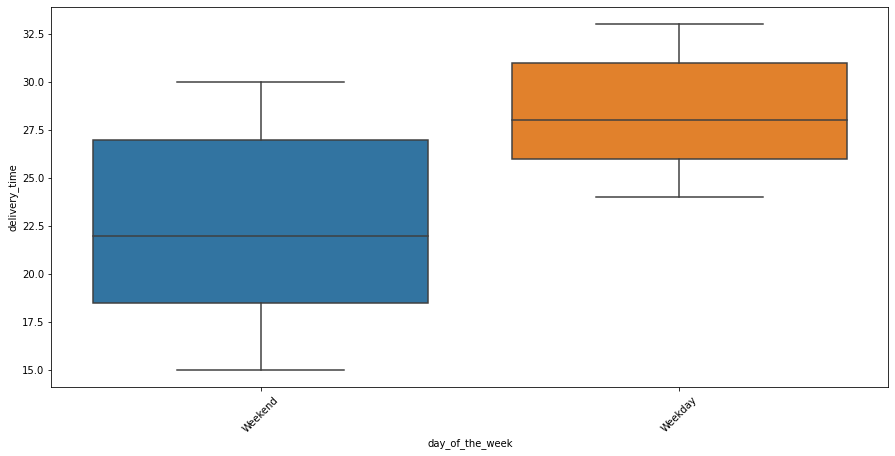

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.barplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.xticks(rotation = 45)
plt.show()

#### Observations:
* The average time to deliver the food is longer on weekdays compared to weekdends this is probably because there are less employess available to deliver during the weekdays.
* The distribution for delivery time on weekdays has a smaller spread than on weekends but is higher. In general, it takes longer for orders to be delivered on weekdays than on weekends.

In [ ]:
df.groupby(['rating'])['cost_of_the_order'].mean()

rating
3            16.223351
4            16.710337
5            16.965697
Not given    16.085340
Name: cost_of_the_order, dtype: float64

<ipython-input-49-3cf1b5ea77c3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, ci = False, order = df.rating.value_counts().index)


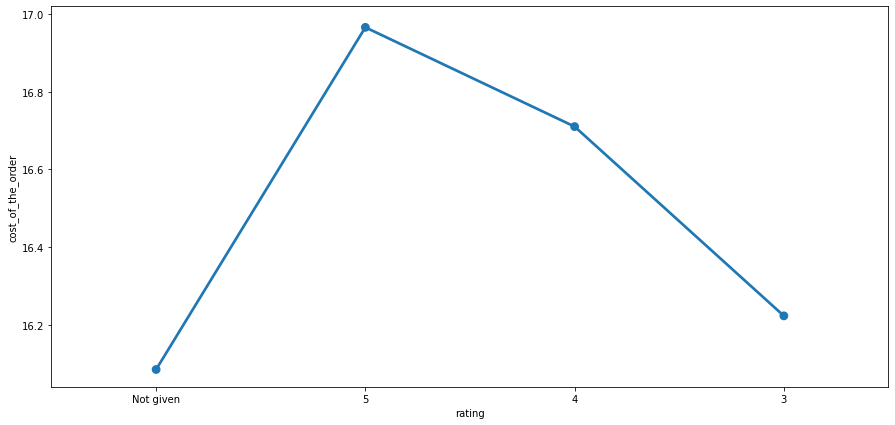

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, ci = False, order = df.rating.value_counts().index)
plt.show()

#### Observations:
Although the average cost of an order seems to be relatively similar throughout the ratings, it appears that orders with hiigher ratings have slightly higher order costs. This indicates a positive relationship. Orders that did not receive a rating have the lowest cost per order.

In [ ]:
df.groupby(['rating'])['food_preparation_time'].mean()

rating
3            27.430851
4            27.396373
5            27.355442
Not given    27.357337
Name: food_preparation_time, dtype: float64

<ipython-input-102-dbd068d67aa3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, ci = False, order = df.rating.value_counts().index)


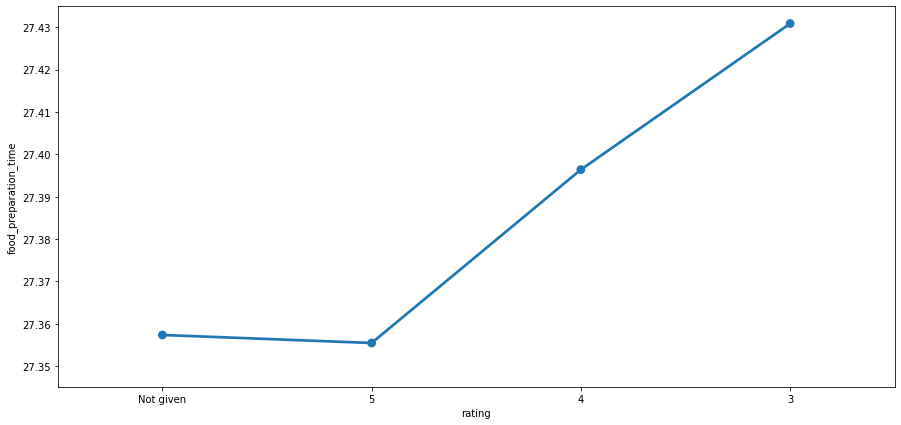

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, ci = False, order = df.rating.value_counts().index)
plt.show()

#### Observations:
Although the average time to prepare the food seems to be relatively similar throughout the ratings, it appears that orders with hiigher ratings have slightly lower food preparation times. This indicates a negative relationship. Orders that did not receive a rating do not seem to follow this pattern.

In [ ]:
df.groupby(['rating'])['delivery_time'].mean()

rating
3            24.558511
4            23.867876
5            24.212585
Not given    24.173913
Name: delivery_time, dtype: float64

<ipython-input-101-1b2fb5038309>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = 'rating', y = 'delivery_time', data = df, ci= False, order = df.rating.value_counts().index)


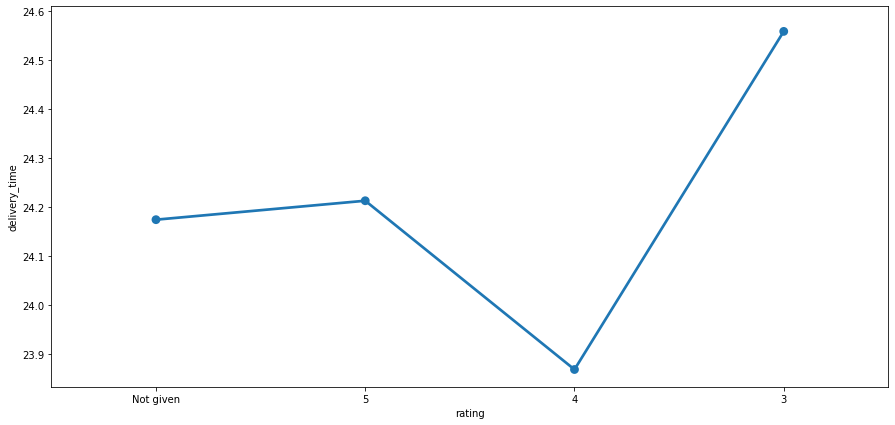

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, ci= False, order = df.rating.value_counts().index)
plt.show()

#### Observations:
The average time to deliver the food appears to be pretty similar throughout the ratings. There does not seem to be a discernable pattern that emerges from these two variables. However, it is interesting to see that orders that received a 4 point rating had the shortest delivery times and orders that received a 3 point rating had the longest delivery times.

### **The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.**

In [ ]:
# Filter the rated restaurants and make a copy of the table
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

The restaurants that qualify for the promotional offer are The Meatballl Shop, Blue Ribbin Fried Chicken, Shake Shack, and Blue Ribbin Sushi. Out of these four restaurants, The Meatball Shop had the highest average rating of 4.5.

### **The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.**

In [ ]:
# Create function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Create a new column in the DataFrame called Revenue using the function above
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
print('The net revenue is around', '${:.2f}'.format(df['Revenue'].sum()))

The net revenue is around $6166.30


#### Observations:
The net revenue generated by FoodHub across all the orders is \$6,166.30.

### **The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?**

In [ ]:
# Add a new column to the dataset called total time, which adds the food preparation time and delivery time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Return the number of total orders where the total time for delivery was greater than 60 minutes
df_greater_than_60 = df[df['total_time']>60]
print('The number of orders with a total delivery time greater than 60 minutes:', df_greater_than_60.shape[0])
df_greater_than_60.head()

# Calculate percentage of such orders in the dataset
percent = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print('Percentage:', '{:.2f}%'.format(percent))

The number of orders with a total delivery time greater than 60 minutes: 200
Percentage: 10.54%


#### Observations:
There are a total of 200 FoodHub orders which took over 60 minutes to be prepared and delivered to the customer. That is about 10.54% of orders out of all the orders on FoodHub that took over an hour to rech the customer. 

### **The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?**

In [ ]:
# Return the average delivery times for orders placed on weekdays and weekends
round(df.groupby(['day_of_the_week'])['delivery_time'].mean())

day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64

#### Observations:
FoodHub orders are delivered faster on weekends than on weekdays.
* The average time it took for FoodHub orders to be delivered on weekdays is about 28 minutes.
* The average time it took for FoodHub orders to be delivered on weekends is about 22 minutes.




### Conclusion and Recommendations

### Conclusions:
1.  784 customers (65% of the customer base) have only made one purchase from FoodHub. The next highest population of customers is 267 (22% of the customer base) who made only two orders.
2.  There were 736 orders (about 39% of all orders) on FoodHub that were not given a rating. Out of the orders that were rated, 5 stars comprised the majority with 588 orders (31% of all orders) and 3 stars had the fewest amount of orders with 188 orders (10% of all orders).
3.  1,351 FoodHub orders (71% of all orders) were placed on weekends whereas only 547 orders (29% of all orders) were placed on weekdays.
4.  The most popular type of cusine across all the FoodHub orders was American with 584 orders followed by Japanese and Italian with 470 and 298 orders, respectively. The least popular cuisines appear to be Korean, Spanish, and Vietnamese with 13, 12, and 7 orders, respectively. 

### Recommendations:

1.  In order to get customers to make more purchases, A rewards system could be implemented. This will incentivize customers to make more orders from their favorite restaurants. For instance, whenever a customer makes an order from FoodHub, they will accrue points. Once they have accrued a certain amount of points, they will receive benefits, such as $10 off their next FoodHub order. Tangeable benefits and effective marketing campaigns will increase the customer retention rate. Testimonials from frequent customers could also be acquired to analyze their buying patterns and behaviors.
2. To enhance the data available for determining customer satisfaction and enabling service improvements, it would be wise to encourage customers to rate their orders and provide direct feedback to both FoodHub and the restaurants they order from. This can be achieved by offering customers incentives or survey with them to understand why they opt not to rate the service. Improving the overall efficiency of the platform, such as restaurants decreasing food preparation time and FoodHub streamlining the delivery methods, will likely encourage customers to give higher and more frequent ratings. This will provide better insight into customer satisfaction levels and help identify areas for service improvements.
3.  FoodHub needs to analyze the demand and supply of delivery workers, as the majority of orders are placed during the weekend. This will help improve the delivery times, which in turn will enhance the customer experience. To increase the order cost for weekend customers, FoodHub should focus on this population size. For weekday customers, FoodHub should analyze their delivery locations to determine if they are ordering from home or work. This will give critical insights about the most optimal times for deliveries during the weekdays. 
4. There is a disparity on how much traffic different types of cuisines receive on FoodHub. A few reasons as to why this might be happening is because a certain cuisine might be relatively unkown or were recently introduced on FoodHub. For niche cuisine, a cost-benefit and SWOT analysis can be conducted on the underperforming restaurants to identify areas for improvement. For newly introduced cuisines types, FoodHub should advertise and market them so that they gain more traction on the platform, possibly gaining a new customer base.

Perhaps a more comprehensive market segmentation model and customer segmentation model could be developed if more data had been collected. More data could have provided critical insights on how FoodHub can break into new markets and target diverse customer groups based on their purchasing patterns.


---